In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import platform
from matplotlib import font_manager, rc
from pprint import *
%matplotlib inline
plt.rcParams['axes.unicode_minus']=False
# path = ("/System/Library/Fonts/Supplemental/AppleGothic.ttf")
path = 'C:/Windows/Fonts/HMKMRHD.TTF'
if platform.system() =='Darwin':
    rc('font', family='NanumSquareRoundR')
elif platform.system()=='Windows':
    font_name = font_manager .FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...')
sns.set(style="whitegrid") 
squid = pd.read_csv(r"C:\Users\yuhwan\PycharmProjects\pythonsm1\bc_test\수산 전처리\수산 전처리\오징어 데이터.csv")
del squid['Unnamed: 0']
squid.columns = ['기준일','제품구분','제조국','수출국','수입용도','중분류명 카테고리','어종','상세어종','수입형태','평균단가($)']
squid.tail()

,기준일,제품구분,제조국,수출국,수입용도,중분류명 카테고리,어종,상세어종,수입형태,평균단가($)
2766,2020-12-28,수산물,페루,페루,판매용,연체류 해물모듬,오징어,오징어,"냉동,다리",2.16
2767,2020-12-28,수산물,페루,페루,판매용,연체류 해물모듬,오징어,오징어,"냉동,동체,자숙",2.91
2768,2020-12-28,수산물,페루,페루,판매용,연체류 해물모듬,오징어,오징어,"냉동,지느러미",1.33
2769,2020-12-28,수산물,중국,중국,판매용,연체류 해물모듬,오징어,오징어,"냉동,동체",2.09
2770,2020-12-28,수산물,중국,중국,판매용,연체류 해물모듬,오징어,오징어,냉동,3.15


거래건수 확인 및 비율

In [3]:
squid_su_list = squid['수입용도'].value_counts()   # 수입형태
print(squid_su_list.sum())
print(squid_su_list)

2771
판매용         2411
자사제품제조용      322
외화획득용 원료      28
반송품(기타)        5
외화획득용 제품       5
Name: 수입용도, dtype: int64


In [4]:
# 수입용도 수입형태 수출국 
squid_su_dict=squid_su_list.to_dict()
squid_su_dict.items()
kk=[]
vv=[]
per=[]
for k,v in squid_su_dict.items():
    kk.append(k)
    vv.append(v)
    per.append((v/2771)*100)        
squid_su_per=pd.DataFrame({'수입용도':kk,'value_count':vv,'per':per})
squid_su_per
# squid_su_per.to_csv("C:\\Users\\yuhwan\\PycharmProjects\\pythonsm1\\bc_test\squidmeta\\통합수입용도건수_전체건수per.csv")

,수입용도,value_count,per
0,판매용,2411,87.008300
1,자사제품제조용,322,11.620354
2,외화획득용 원료,28,1.010466
3,반송품(기타),5,0.180440
4,외화획득용 제품,5,0.180440


수출국과 제조국 같지 않은 경우 


In [19]:
mask_nation_diff=squid['제조국']==squid['수출국']  #  같은경우
mask_nation_diff2=squid['제조국']!=squid['수출국']  #  같지 않은 경우 
squ_nation_diff1 = squid[mask_nation_diff].reset_index(drop=True).drop(['중분류명 카테고리','어종','상세어종'],axis=1)
squ_nation_diff2 = squid[mask_nation_diff2].reset_index(drop=True).drop(['중분류명 카테고리','어종','상세어종'],axis=1)

# squ_nation_diff2_1= squ_nation_diff1.groupby(['제조국','수출국','수입형태'])['평균단가($)'].count()
# squ_nation_diff2.to_csv("제조국수출국왜케많이다를까.csv")
# squ_nation_diff2_2 = squ_nation_diff2.groupby(['제조국','수출국','수입형태'])['평균단가($)'].count()
# squ_nation_diff2_1
# squ_nation_diff2_1.to_csv("C:\\Users\\yuhwan\\PycharmProjects\\pythonsm1\\bc_test\squidmeta\\수출국과제조국같은경우_카운트_평균단가_오징어_cp949.csv",encoding='cp949')
# squ_nation_diff2_2.to_csv("C:\\Users\\yuhwan\\PycharmProjects\\pythonsm1\\bc_test\squidmeta\\수출국과제조국다른경우_카운트_평균단가_오징어_cp949.csv",encoding='cp949')

수출국 기준으로 수입용도 분석

In [6]:
##  총합 sum() 으로 변경 
squ_suip_mean0 = squid.groupby(['수출국','수입용도']).sum()
squ_suip_mean1 = squid.groupby(['수출국','제조국','수입용도']).sum()
squ_suip_mean2 = squid.groupby(['수출국','제조국','수입형태','수입용도']).sum()
squ_suip_mean3 = squid.groupby(['수출국','수입형태','수입용도']).sum()

# squ_suip_mean0.unstack()['평균단가($)'].to_csv("오징어_수입용도_수출국_sum.csv",encoding="cp949")
# squ_suip_mean1.unstack()['평균단가($)'].to_csv("오징어_수입용도_수출국_제조국_sum.csv",encoding="cp949")
# squ_suip_mean2.unstack()['평균단가($)'].to_csv("오징어_수입용도_수출국_제조국_수입형태_sum.csv",encoding="cp949")
# squ_suip_mean3.unstack()['평균단가($)'].to_csv("오징어_수입용도_수출국_수입형태_sum.csv",encoding="cp949")

수출국 기준으로 수입형태 분석

In [7]:
squ_suip_mean0 = squid.groupby(['수출국','수입형태']).mean()
squ_suip_mean1 = squid.groupby(['수출국','제조국','수입형태']).mean()
# squ_suip_mean0.unstack()['평균단가($)'].to_csv("오징어_수입형태_수출국_mean.csv",encoding="cp949")
# squ_suip_mean1.unstack()['평균단가($)'].to_csv("오징어_수입형태_수출국_제조국_mean.csv",encoding="cp949")
di = pd.DataFrame(squ_suip_mean0['평균단가($)'])
di.unstack(level=0)

평균단가($)                                                \
수출국             남아프리카 공화국      뉴질랜드        대만       러시아        미국  바누아투   
수입형태                                                                      
건조                    NaN       NaN       NaN       NaN       NaN   NaN   
냉동                    1.2  3.548028  3.473006  2.672301  2.467338  2.33   
냉동,난포선                NaN       NaN       NaN       NaN       NaN   NaN   
냉동,다리                 NaN       NaN  2.700000       NaN       NaN   NaN   
냉동,다리,자숙              NaN       NaN       NaN       NaN       NaN   NaN   
냉동,동체                 NaN       NaN  2.383333  1.500000       NaN   NaN   
냉동,동체,자숙              NaN       NaN       NaN       NaN       NaN   NaN   
냉동,동체,포장횟감            NaN       NaN       NaN       NaN       NaN   NaN   
냉동,슬라이스(S)            NaN       NaN       NaN       NaN       NaN   NaN   
냉동,슬라이스(S),포장횟감       NaN       NaN       NaN       NaN       NaN   NaN   
냉동,자숙                 NaN       NaN       NaN       NaN       NaN   NaN   
냉동,지느러미               NaN       NaN       NaN  1.800000       NaN   NaN   
냉동,지느러미,자숙            NaN       NaN       NaN       NaN       NaN   NaN   

                                                                             \
수출국                  베트남       스페인     아르헨티나  에콰도르     우루과이     인도네시아    일본   
수입형태                                                                          
건조                   NaN       NaN       NaN   NaN      NaN       NaN   NaN   
냉동               2.84381  3.274358  3.383118  1.93  2.92792  2.220650  4.80   
냉동,난포선               NaN       NaN       NaN   NaN      NaN       NaN   NaN   
냉동,다리                NaN       NaN  3.180000  1.54      NaN  2.511479  1.01   
냉동,다리,자숙             NaN       NaN       NaN   NaN      NaN       NaN   NaN   
냉동,동체                NaN       NaN       NaN   NaN      NaN       NaN   NaN   
냉동,동체,자숙             NaN       NaN       NaN   NaN      NaN       NaN   NaN   
냉동,동체,포장횟감           NaN       NaN       NaN   NaN      NaN       NaN   NaN   
냉동,슬라이스(S)           NaN       NaN       NaN   NaN      NaN  2.782787   NaN   
냉동,슬라이스(S),포장횟감      NaN       NaN       NaN   NaN      NaN       NaN   NaN   
냉동,자숙                NaN       NaN       NaN   NaN      NaN       NaN   NaN   
냉동,지느러미              NaN       NaN       NaN   NaN      NaN  2.512273   NaN   
냉동,지느러미,자숙           NaN       NaN       NaN   NaN      NaN       NaN   NaN   

                                                                         
수출국                     중국        칠레       캐나다   태국        페루       필리핀  
수입형태                                                                     
건조               18.939714       NaN       NaN  NaN       NaN       NaN  
냉동                3.236208  2.158182  2.684591  6.2  1.583636       NaN  
냉동,난포선                 NaN  2.133333       NaN  NaN       NaN       NaN  
냉동,다리             1.919224  1.902899       NaN  NaN  1.833333       NaN  
냉동,다리,자숙          3.575000  5.540000       NaN  NaN  4.350000       NaN  
냉동,동체             2.291371  1.885280       NaN  NaN  2.138628  8.713783  
냉동,동체,자숙          3.859700  3.733166       NaN  NaN  5.662385       NaN  
냉동,동체,포장횟감        1.700000       NaN       NaN  NaN       NaN       NaN  
냉동,슬라이스(S)        3.039529       NaN       NaN  NaN       NaN       NaN  
냉동,슬라이스(S),포장횟감  12.300000       NaN       NaN  NaN       NaN       NaN  
냉동,자숙             2.519687       NaN       NaN  NaN       NaN       NaN  
냉동,지느러미           1.882185  1.567823       NaN  NaN  1.667633       NaN  
냉동,지느러미,자숙             NaN  3.010000       NaN  NaN  2.830856       NaN

수입형태 기준으로 수입용도 분석

In [8]:
pdp=squid.pivot_table(index=['수입형태'],columns=['수입용도'],values='평균단가($)',aggfunc='count')
# pdp.to_csv("오징어_수입형태_수입용도_카운트.csv",encoding="cp949")
pdp

수입용도,반송품(기타),외화획득용 원료,외화획득용 제품,자사제품제조용,판매용
수입형태,,,,,
건조,NaN,NaN,NaN,1.0,4.0
냉동,5.0,17.0,5.0,21.0,519.0
"냉동,난포선",NaN,NaN,NaN,NaN,3.0
"냉동,다리",NaN,3.0,NaN,51.0,492.0
"냉동,다리,자숙",NaN,NaN,NaN,6.0,5.0
"냉동,동체",NaN,8.0,NaN,15.0,545.0
"냉동,동체,자숙",NaN,NaN,NaN,165.0,280.0
"냉동,동체,포장횟감",NaN,NaN,NaN,2.0,NaN
"냉동,슬라이스(S)",NaN,NaN,NaN,NaN,33.0


# 년 월 분기 컬럼 추가 

In [9]:
squid2 = squid
squid2 = squid2.drop(['제품구분','중분류명 카테고리','어종','상세어종'],axis=1)

squid2['기준일']=squid2['기준일'].apply(lambda x : pd.to_datetime(str(x),format='%Y-%m-%d'))
squid2.set_index('기준일',inplace=True)
squid2['월']=squid2.index.month
squid2['년']=squid2.index.year
squid2.reset_index(inplace=True)
squid2['분기']=squid2['기준일'].dt.quarter
# squid2.to_csv("오징어_년_월_분기_컬럼추가.csv")

# 년도별 수출국 수입형태 수입용도 평균단가

In [10]:
si1 = squid2.groupby(['년','수출국'])['평균단가($)'].mean()
si2 = squid2.groupby(['년','수입형태'])['평균단가($)'].mean()
si3 = squid2.groupby(['년','수입용도'])['평균단가($)'].mean()
# si1.unstack().to_csv("오징어_년도_수출국평균.csv")
# si2.unstack().to_csv("오징어_년도_수입형태평균.csv")
# si3.unstack().to_csv("오징어_년도_수입용도평균.csv")


# 분기별 수출국 수입형태 수입용도 평균단가

In [11]:
si1 = squid2.groupby(['분기','수출국'])['평균단가($)'].mean()
si2 = squid2.groupby(['분기','수입형태'])['평균단가($)'].mean()
si3 = squid2.groupby(['분기','수입용도'])['평균단가($)'].mean()
# si1.unstack().to_csv("오징어_분기_수출국평균.csv")
# si2.unstack().to_csv("오징어_분기_수입형태평균.csv")
# si3.unstack().to_csv("오징어_분기_수입용도평균.csv")

# 월별 수출국 수입형태 수입용도 평균단가

In [12]:
si1 = squid2.groupby(['월','수출국'])['평균단가($)'].mean()
si2 = squid2.groupby(['월','수입형태'])['평균단가($)'].mean()
si3 = squid2.groupby(['월','수입용도'])['평균단가($)'].mean()
# si1.unstack().to_csv("오징어_월_수출국평균.csv")
# si2.unstack().to_csv("오징어_월_수입형태평균.csv")
# si3.unstack().to_csv("오징어_월_수입용도평균.csv")
# si1.unstack()

주별 수입형태 수입용도 수출국 분석

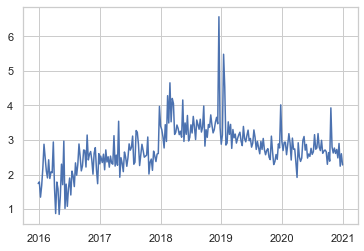

In [13]:
squid_mean = squid2.groupby(['기준일'])['평균단가($)'].mean()
plt.plot(squid_mean)
plt.show()

각 수출국별 주별 평균단가 비교 

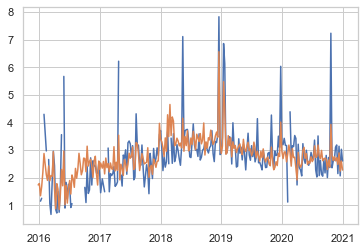

In [14]:
squid2_y_m = squid2.pivot_table(index=['기준일'],columns=['수출국'],values=['평균단가($)'],aggfunc='mean')
squid2_y_m2 = squid2.pivot_table(index=['기준일'],columns=['수출국'],values=['평균단가($)'],aggfunc='sum')
squid2_y_m3 = squid2.pivot_table(index=['기준일'],columns=['수출국'],values=['평균단가($)'],aggfunc='count')

# squid2_y_m.to_csv("오징어_주_수출국평균.csv")
ooo = pd.concat([squid2_y_m2,squid2_y_m,squid2_y_m3],axis=1)
# ooo['평균단가($)'].to_csv("오징어_주_수출국_합_평균_카운트.csv")
aa =squid2_y_m['평균단가($)']
plt.plot(aa['중국'])
plt.plot(squid_mean)
plt.show()


각 수입형태별 주별 평균단가 비교 

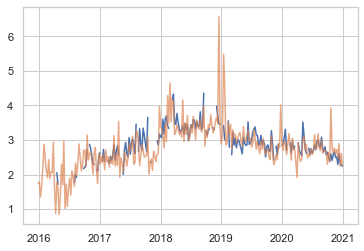

In [15]:
squid2_y_m = squid2.pivot_table(index=['기준일'],columns=['수입형태'],values=['평균단가($)'],aggfunc='mean')
squid2_y_m2 = squid2.pivot_table(index=['기준일'],columns=['수입형태'],values=['평균단가($)'],aggfunc='sum')
squid2_y_m3 = squid2.pivot_table(index=['기준일'],columns=['수입형태'],values=['평균단가($)'],aggfunc='count')

# squid2_y_m.to_csv("오징어_주_수출국평균.csv")
# ooo['평균단가($)'].to_csv("오징어_주_수입형태_합_평균_카운트.csv")
ooo = pd.concat([squid2_y_m2,squid2_y_m,squid2_y_m3],axis=1)
aa =squid2_y_m['평균단가($)']
bb=(aa['냉동']+aa['냉동,다리']+aa['냉동,동체']+aa['냉동,지느러미']+aa['냉동,동체,자숙'])/5
plt.plot(bb)
plt.plot(squid_mean,alpha=0.7)
plt.show()

각 수입용도별 주별 평균단가 비교 

In [16]:
quid2_y_m = squid2.pivot_table(index=['기준일'],columns=['수입용도'],values=['평균단가($)'],aggfunc='mean')
squid2_y_m2 = squid2.pivot_table(index=['기준일'],columns=['수입용도'],values=['평균단가($)'],aggfunc='sum')
squid2_y_m3 = squid2.pivot_table(index=['기준일'],columns=['수입용도'],values=['평균단가($)'],aggfunc='count')

ooo = pd.concat([squid2_y_m2,squid2_y_m,squid2_y_m3],axis=1)
# ooo['평균단가($)'].to_csv("오징어_주_수입용도_합_평균_카운트.csv")
cc =squid2_y_m['평균단가($)']
# bb=(aa['냉동']+aa['냉동,다리']+aa['냉동,동체']+aa['냉동,지느러미']+aa['냉동,동체,자숙'])/5
# plt.plot(aa['판매용'])
# plt.plot(squid_mean,alpha=0.7)
# plt.show()]
cc

수입형태,건조,냉동,"냉동,난포선","냉동,다리","냉동,다리,자숙","냉동,동체","냉동,동체,자숙","냉동,동체,포장횟감","냉동,슬라이스(S)","냉동,슬라이스(S),포장횟감","냉동,자숙","냉동,지느러미","냉동,지느러미,자숙"
기준일,,,,,,,,,,,,,
2015-12-28,NaN,NaN,NaN,1.100000,NaN,1.246667,5.480000,NaN,NaN,NaN,NaN,0.760000,NaN
2016-01-04,NaN,NaN,NaN,1.016667,NaN,1.020000,4.475000,NaN,NaN,NaN,NaN,0.640000,NaN
2016-01-11,NaN,NaN,NaN,1.040000,NaN,1.045000,3.740000,NaN,NaN,NaN,NaN,0.755000,NaN
2016-01-18,NaN,NaN,NaN,1.140000,NaN,0.890000,4.095000,NaN,1.75,NaN,NaN,0.720000,NaN
2016-01-25,NaN,NaN,NaN,0.780000,NaN,0.940000,5.005000,NaN,NaN,NaN,NaN,0.600000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-30,NaN,2.999561,NaN,1.975569,NaN,1.439549,3.949338,NaN,NaN,NaN,NaN,1.075026,NaN
2020-12-07,NaN,3.435201,NaN,2.200850,NaN,1.941918,4.305471,NaN,NaN,NaN,NaN,1.087795,NaN
2020-12-14,NaN,3.384196,NaN,2.078722,NaN,1.396876,3.530885,NaN,NaN,NaN,NaN,1.376062,1.870943


두바이유 환율 평균 분석

In [ ]:
hu = pd.read_csv(r"C:\Users\yuhwan\PycharmProjects\pythonsm1\bc_test\전처리후데이터(주기준)\전처리통합주별평균_두바이유_환율비교.csv",encoding="cp949")

corr = hu.corr(method='pearson')
# plt.plot(hu['P_PRICE'])
# plt.figure()
# plt.plot(hu['환율'])
# plt.figure()
# plt.plot(hu['두바이유'])
# k = sqr['CTRY_2']=='중국'
# plt.figure()
# plt.plot(uu['P_PRICE'])
# hu['환율'].corr(uu['P_PRICE'])
# hu.shape , uu.shape

fig, ax1 = plt.subplots()
ax1.plot(hu.index, hu['P_PRICE'], color='green')

ax2 = ax1.twinx()
ax2.plot(hu.index, hu['두바이유'], color='deeppink')

plt.show()

In [ ]:
sqr1 = squid2
sqr1['기준일']=pd.to_datetime(sqr1['기준일'], format="%Y-%m-%d")

sqr1.drop(['년','월','분기'],axis=1)

주별 기준 수입형태 평균 분석 

In [ ]:
j = sqr1['수입형태']=='냉동'  # 냉동 냉동지느러미 
uu = sqr1[j]
uu= uu.groupby(['기준일','수출국'])['평균단가($)'].mean()
ji = uu.unstack()
# ji.to_csv('./냉동동체자숙비교용_총합.csv')
ji
## 주요 수입형태 7 개 하나씩 .

노이즈 데이터, 이상치 제거

In [ ]:
sqr =  pd.read_csv(r"C:\Users\yuhwan\PycharmProjects\pythonsm1\bc_test\수산 전처리\수산 전처리\오징어 데이터3.csv",encoding='cp949')
## 인덱스 합치기
## 각각 바꿔가며 저장 비교
## 'P_PURPOSE'   'P_IMPORT_TYPE'  'CTRY_2'
aa = sqr.groupby(['REG_DATE','CTRY_2','P_PURPOSE'])['P_PRICE'].count()
aa.to_csv("임시테스트.csv")
aa = pd.read_csv("임시테스트.csv")
aa['su+na']= aa['CTRY_2'].str.cat(aa['P_PURPOSE'],sep =',')
aa.drop(columns=['CTRY_2','P_PURPOSE'],axis=1)
bb = aa.groupby(['REG_DATE','su+na']).sum()
cc = bb.unstack()
cc = cc['P_PRICE']
# cc.to_csv("./전처리_수입용도_수출국_카운트.csv",encoding="cp949")
cc


수출국 수입형태 수입용도 별 데이터 생성 

In [ ]:
## 'P_PURPOSE'   'P_IMPORT_TYPE'  'CTRY_2'
aa1 = sqr.groupby(['REG_DATE','P_PURPOSE'])['P_PRICE'].count()
bb1 = aa1.unstack()
# bb1.to_csv('./전처리후데이터(주기준)/전처리후수입용도별카운트.csv')
bb1

In [ ]:
### 전처리 후  총합. 
aa1 = sqr.groupby(['REG_DATE','P_IMPORT_TYPE'])['P_PRICE'].sum()
bb1 = aa1.unstack()
# bb1.to_csv('./전처리후데이터(주기준)/전처리후나라별총합.csv')

In [ ]:
### 전처리 후 평균.. 
aa1 = sqr.groupby(['REG_DATE','CTRY_2'])['P_PRICE'].mean()
bb1 = aa1.unstack()

# bb1.to_csv('./전처리후데이터(주기준)/전처리후나라별평균.csv')

In [ ]:
### 전처리 후 수입형태 평균.. 
aa3 = sqr.groupby(['REG_DATE','P_IMPORT_TYPE'])['P_PRICE'].mean()
bb3 = aa3.unstack()
bb4 = pd.DataFrame(bb3)
# bb1.to_csv('./전처리후데이터(주기준)/전처리후나라별평균.csv')
bb4=bb4.interpolate()  # 
bb4
# bb4.to_csv('./전처리후데이터(주기준)/전처리후수입형태별평균_결측치보간.csv')

주요 수입형태 비교 추가자료

In [ ]:
j = sqr['P_IMPORT_TYPE']=='냉동'  # 냉동 냉동지느러미 
uu = sqr[j]
uu= uu.groupby(['REG_DATE','CTRY_2'])['P_PRICE'].mean()
ji = uu.unstack()
# ji.to_csv('./전처리후데이터(주기준)/냉동동체자숙비교용_총합.csv')